# Titatanic survivors data analysis

## Initialisation

In [2]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline

## Data preparation

### Load data

In [3]:
train = pd.read_pickle('../data/train_prep.pkl')
test = pd.read_pickle('../data/test_prep.pkl')

In [32]:
outcome = pd.read_csv('../data/train.csv', usecols=['Survived'], squeeze=True)
testId = pd.read_csv('../data/test.csv', usecols=['PassengerId'], squeeze=True)

### Prepare X and y matrices

In [5]:
X = train
y = outcome
Xtr, Xval, ytr, yval = train_test_split(X, y, test_size=0.15, random_state=777)

In [6]:
Xtr.shape, Xval.shape

((757, 17), (134, 17))

## Naive prediction

In [7]:
womenSurvidedProportion = y[X.IsMale == False].mean()
menSurvidedProportion = y[X.IsMale == True].mean()
print('Proportion of women who survived is %s' % womenSurvidedProportion)
print('Proportion of men who survived is %s' % menSurvidedProportion)

Proportion of women who survived is 0.7420382165605095
Proportion of men who survived is 0.18890814558058924


In [8]:
womenProportion = (X.IsMale == False).mean()
menProportion = (X.IsMale == True).mean()

naivePrediction = womenProportion * womenSurvidedProportion + menProportion * (1 - menSurvidedProportion)
print('Naive correct prediction: %s' % naivePrediction)

Naive correct prediction: 0.786756453423


## Logistic regression

### First run

In [9]:
lr = LogisticRegression()
lr.fit(Xtr, ytr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
(lr.predict(Xtr) == ytr).mean()

0.84147952443857332

In [11]:
lr.score(Xtr, ytr)

0.84147952443857332

In [12]:
print('Train correct prediction: ', lr.score(Xtr, ytr))
print('Validation correct prediction: ', lr.score(Xval, yval))

Train correct prediction:  0.841479524439
Validation correct prediction:  0.820895522388


### Parameters optimisation

In [13]:
Cs = 10**np.linspace(-4, 4, num=15)
Cs

array([  1.00000000e-04,   3.72759372e-04,   1.38949549e-03,
         5.17947468e-03,   1.93069773e-02,   7.19685673e-02,
         2.68269580e-01,   1.00000000e+00,   3.72759372e+00,
         1.38949549e+01,   5.17947468e+01,   1.93069773e+02,
         7.19685673e+02,   2.68269580e+03,   1.00000000e+04])

In [19]:
grid = {'C': Cs}
gridsearch = GridSearchCV(LogisticRegression(), grid, cv=10)

In [20]:
%time gridsearch.fit(Xtr, ytr)

Wall time: 764 ms


GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-04,   3.72759e-04,   1.38950e-03,   5.17947e-03,
         1.93070e-02,   7.19686e-02,   2.68270e-01,   1.00000e+00,
         3.72759e+00,   1.38950e+01,   5.17947e+01,   1.93070e+02,
         7.19686e+02,   2.68270e+03,   1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [21]:
gridsearch.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
scores = [x.mean_validation_score for x in  gridsearch.grid_scores_]

Best lambda:  1.0
Maximum validation score:  0.830911492734


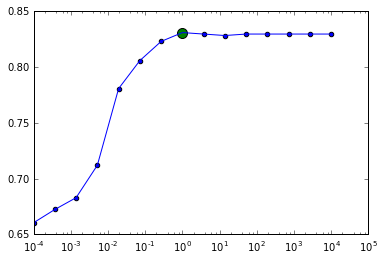

In [23]:
plt.plot(Cs, scores)
plt.scatter(Cs, scores)
plt.scatter(Cs[np.argmax(scores)], scores[np.argmax(scores)], c='g', s=100)
plt.xscale('log')
print('Best lambda: ', Cs[np.argmax(scores)])
print('Maximum validation score: ', scores[np.argmax(scores)])

In [24]:
C = Cs[np.argmax(scores)]
lr = LogisticRegression(C=C)
lr.fit(Xtr, ytr)
print('Train correct prediction: ', lr.score(Xtr, ytr))
print('Validation correct prediction: ', lr.score(Xval, yval))

Train correct prediction:  0.841479524439
Validation correct prediction:  0.820895522388


In [25]:
lr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
prediction = lr.predict(test)

In [30]:
prediction

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [33]:
submit = pd.DataFrame({'PassengerId': testId, 'Survived': prediction})

In [34]:
submit.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [37]:
submit.to_csv('../output/2016-04-27-bff-logistic-regression.csv', index=False)